# BBM 469 Assignment 3

#### Student no : 21803696
#### Student name : Nur Altıparmak



## Table of Content

[Purpose](#purpose)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

This project aims to diagnose breast cancer by using clustering and classification methods in spark environment.

## Data Understanding<a class="anchor" id="data_understanding"></a>

The dataset that i used this project consist of 2 target classes called malignant (212) and benign(357) and 569 instances.All features types are string.

In [100]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.0-preview2-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop3.2"

spark-3.0.0-preview2-bin-hadoop3.2/
spark-3.0.0-preview2-bin-hadoop3.2/data/
spark-3.0.0-preview2-bin-hadoop3.2/data/streaming/
spark-3.0.0-preview2-bin-hadoop3.2/data/streaming/AFINN-111.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_binary_classification_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_kmeans_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_multiclass_classification_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_lda_libsvm_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/iris_libsvm.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/pagerank_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/sample_linear_regression_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/pic_data.txt
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/als/
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/als/test.data
spark-3.0.0-preview2-bin-hadoop3.2/data/mllib/als/sample_movielens_rati

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [102]:
from google.colab import files
files.upload()

Saving data.csv to data (1).csv


{'data.csv': b'"id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst",\r\n842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189\r\n842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,0.2416,0.186,0.275,0.08902\r\n84300903,M,1

In [103]:
OD = spark.read.csv("data.csv",header=True) #Creating a spark dataframe
OD.createOrReplaceTempView("OD")
print(spark.catalog.listTables())
OD.show(5)

[Table(name='od', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave poi

In [104]:
OD.printSchema()#Finding features types, As i said before all types are string.We have to convert them into float

root
 |-- id: string (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: string (nullable = true)
 |-- texture_mean: string (nullable = true)
 |-- perimeter_mean: string (nullable = true)
 |-- area_mean: string (nullable = true)
 |-- smoothness_mean: string (nullable = true)
 |-- compactness_mean: string (nullable = true)
 |-- concavity_mean: string (nullable = true)
 |-- concave points_mean: string (nullable = true)
 |-- symmetry_mean: string (nullable = true)
 |-- fractal_dimension_mean: string (nullable = true)
 |-- radius_se: string (nullable = true)
 |-- texture_se: string (nullable = true)
 |-- perimeter_se: string (nullable = true)
 |-- area_se: string (nullable = true)
 |-- smoothness_se: string (nullable = true)
 |-- compactness_se: string (nullable = true)
 |-- concavity_se: string (nullable = true)
 |-- concave points_se: string (nullable = true)
 |-- symmetry_se: string (nullable = true)
 |-- fractal_dimension_se: string (nullable = true)
 |-- radiu

In [105]:
print("Malignant count ",OD.filter(OD['diagnosis']=='M').select('diagnosis').count()) #Finding exact number's of each classes
print("Benign count ",OD.filter(OD['diagnosis']=='B').select('diagnosis').count()) #Unbalaced dataset

Malignant count  212
Benign count  357


In [0]:
from pyspark.ml.feature import StringIndexer #Converting diagnosis column into float numbers #0 for benign 1 for malignant
indexer = StringIndexer(inputCol="diagnosis", outputCol="label").fit(OD)
OD = indexer.transform(OD)

In [107]:
OD=OD.drop('_c32','diagnosis')#Getting quick statiscal values and droping unnessary columns 
OD.describe().show()

+-------+--------------------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+-------------------+
|summary|                  id|       radius_mean|     texture_mean|   perimeter_mean|        area_mean|     smoothness_mean|   compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|         radius_se|        texture_se|      perimeter_se|          area_se|       smoothness_se|      compactness_se|  

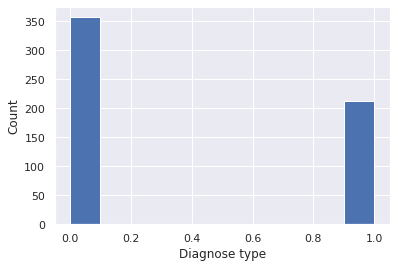

In [108]:
import matplotlib.pyplot as plt #Visualizing dataset's target classes
plt.hist([OD.select("label").collect()[i][0] for i in range(569)])
plt.xlabel("Diagnose type")
plt.ylabel("Count")
plt.show()

In data understanding stage,I simply inspect dataset's features types,target class values and whether dataset contains missing value/non-discriminative columns.I observed that dataset is unbalanced, does not contain missing value but unnessary columns (c_32 column) and all types are string so i have to convert them into numeric values.

## Data Preparation<a class="anchor" id="data_preparation"></a>

In this process, I prepared the dataset for modeling stage.I convert features types into numeric values and normalize dataset for modeling.

In [0]:
from pyspark.sql.types import *  #This methods cast all features into float type and returns new dataset
def cast(columns,df):
    for i in columns:
        df = df.withColumn(i, df[i].cast(FloatType()))
    return df

In [0]:
OD=cast(OD.columns,OD) #Casting all features into float type except label(diagnosis column)
OD=OD.withColumn("label",OD["label"].cast(IntegerType())) #converting label into integer type

In [111]:
OD.printSchema() #Checking dataset's features type after cast method, They are all float and integer

root
 |-- id: float (nullable = true)
 |-- radius_mean: float (nullable = true)
 |-- texture_mean: float (nullable = true)
 |-- perimeter_mean: float (nullable = true)
 |-- area_mean: float (nullable = true)
 |-- smoothness_mean: float (nullable = true)
 |-- compactness_mean: float (nullable = true)
 |-- concavity_mean: float (nullable = true)
 |-- concave points_mean: float (nullable = true)
 |-- symmetry_mean: float (nullable = true)
 |-- fractal_dimension_mean: float (nullable = true)
 |-- radius_se: float (nullable = true)
 |-- texture_se: float (nullable = true)
 |-- perimeter_se: float (nullable = true)
 |-- area_se: float (nullable = true)
 |-- smoothness_se: float (nullable = true)
 |-- compactness_se: float (nullable = true)
 |-- concavity_se: float (nullable = true)
 |-- concave points_se: float (nullable = true)
 |-- symmetry_se: float (nullable = true)
 |-- fractal_dimension_se: float (nullable = true)
 |-- radius_worst: float (nullable = true)
 |-- texture_worst: float (nu

In [0]:
from pyspark.ml.clustering import KMeans  #ND dataset contains both scaled and not scaled feature vector, I used these vector in modeling stage
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline
assembler = VectorAssembler().setInputCols\
            (OD.drop("label","id").columns).setOutputCol("features")
transformed = assembler.transform(OD)
scaler = MinMaxScaler(inputCol="features",\
         outputCol="sf")
scalerModel =  scaler.fit(transformed.select("features"))
ND = scalerModel.transform(transformed)

## Modeling for Clustering <a class="anchor" id="clusteringmodel"></a>

In this stage firstly i visualize a reference point plot (This plot is basically actual values) then respectively i used k-means models for not normalized and normalized dataset and i created their classification reports (since i already know the actuall labels) to examine models quality

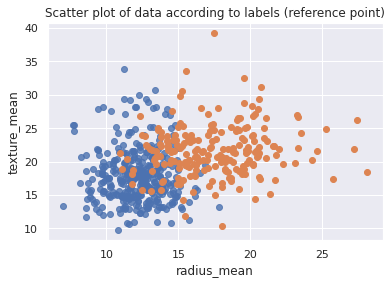

In [155]:
#reference point
tempM=OD[OD.label==1.0].toPandas()
tempB=OD[OD.label==0.0].toPandas()
plt.scatter(tempB['radius_mean'],tempB['texture_mean'],alpha=0.8)
plt.scatter(tempM['radius_mean'],tempM['texture_mean'],alpha=1)
plt.title('Scatter plot of data according to labels (reference point)')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

In [0]:
from pyspark.ml.clustering import KMeans

kmeansOD = KMeans(k=2, seed=42)  # 2 clusters for 2 target classes
modelOD = kmeansOD.fit(ND.select('features'))
transformedOD = modelOD.transform(ND)

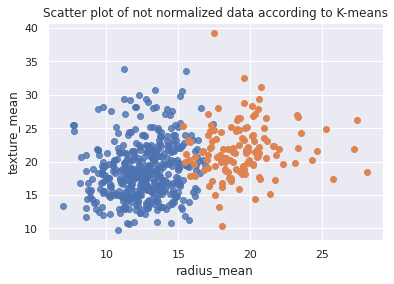

In [156]:
import matplotlib.pyplot as plt #Not normalized dataset's cluster visualization
tempM=transformedOD[transformedOD.prediction==1].toPandas()
tempB=transformedOD[transformedOD.prediction==0].toPandas()
plt.scatter(tempB['radius_mean'],tempB['texture_mean'],alpha=0.8)
plt.scatter(tempM['radius_mean'],tempM['texture_mean'],alpha=1)
plt.title('Scatter plot of not normalized data according to K-means')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

In [116]:
#Cluster report for not normalized data (all features included)
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
tempM=transformedOD[transformedOD.prediction==1].toPandas()
tempB=transformedOD[transformedOD.prediction==0].toPandas()
result = pd.concat([tempM,tempB])
true_labels=(OD.orderBy("id").select("label")).toPandas()
predicted_labels=result.sort_values("id")["prediction"]
print("Cluster report for not normalized data (all features included)\n",classification_report(true_labels, predicted_labels),"\n")
cm=confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix\n",cm)
#As you can see algorithm is a little bit weak on predicting malignant(1)classes due to unbalanced dataset

Cluster report for not normalized data (all features included)
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       357
           1       0.99      0.61      0.76       212

    accuracy                           0.85       569
   macro avg       0.90      0.81      0.83       569
weighted avg       0.88      0.85      0.84       569
 

Confusion matrix
 [[356   1]
 [ 82 130]]


In [0]:
nd=ND.drop("features")
nd=nd.withColumnRenamed("sf", "features")# renaming scaled feature column because sometimes spark gives error
kmeans = KMeans(k=2, seed=42)  # 2 clusters here
model = kmeans.fit(nd.select('features'))
transformed = model.transform(nd)

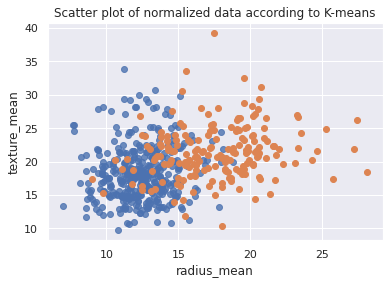

In [157]:
tempM=transformed[transformed.prediction==1].toPandas()
tempB=transformed[transformed.prediction==0].toPandas()
plt.scatter(tempB['radius_mean'],tempB['texture_mean'],alpha=0.8)
plt.scatter(tempM['radius_mean'],tempM['texture_mean'],alpha=1)
plt.title('Scatter plot of normalized data according to K-means')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

In [119]:
#Cluster report for normalized data (all features included)
from sklearn.metrics import classification_report
import pandas as pd
tempM=transformed[transformed.prediction==1].toPandas()#we say all malignant
tempB=transformed[transformed.prediction==0].toPandas()#we say all beningn
result = pd.concat([tempM,tempB])
true_labels=(OD.orderBy("id").select("label")).toPandas()
predicted_labels=result.sort_values("id")["prediction"]
print("Cluster report for  normalized data (all features included)\n",classification_report(true_labels, predicted_labels),"\n")
cmN=confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix\n",cmN)
#Better results on both target classes according to not normalized dataset

Cluster report for  normalized data (all features included)
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       357
           1       0.95      0.85      0.90       212

    accuracy                           0.93       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.93      0.93       569
 

Confusion matrix
 [[348   9]
 [ 32 180]]


## Clustering results<a class="anchor" id="clustering"></a>

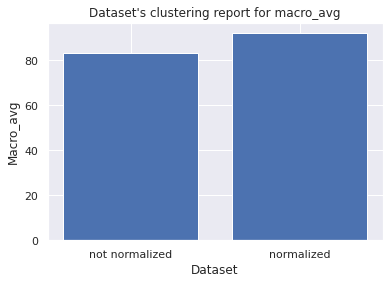

In [120]:
plt.bar(["not normalized","normalized"],[83,92])
plt.title("Dataset's clustering report for macro_avg")
plt.xlabel("Dataset")
plt.ylabel("Macro_avg")
plt.show()

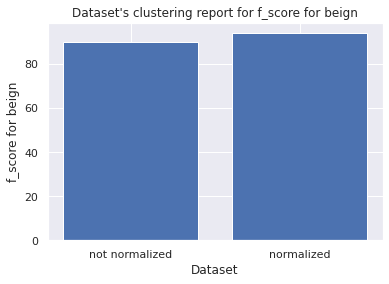

In [121]:
plt.bar(["not normalized","normalized"],[90,94])
plt.title("Dataset's clustering report for f_score for beign")
plt.xlabel("Dataset")
plt.ylabel("f_score for beign")
plt.show()

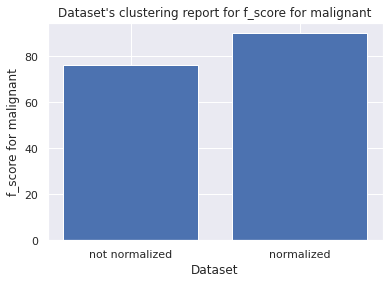

In [122]:
plt.bar(["not normalized","normalized"],[76,90])
plt.title("Dataset's clustering report for f_score for malignant")
plt.xlabel("Dataset")
plt.ylabel("f_score for malignant")
plt.show()

Confusion matrix for not normalized dataset


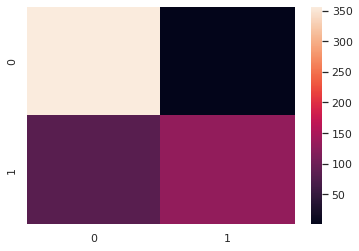

In [123]:
print("Confusion matrix for not normalized dataset")
ax = sns.heatmap(cm)

Confusion matrix for normalized dataset


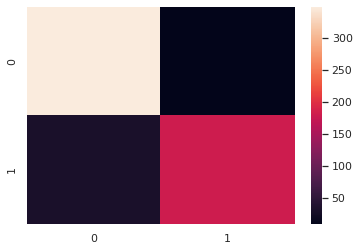

In [124]:
print("Confusion matrix for normalized dataset")
ax = sns.heatmap(cmN)

Basically the normalized dataset is more successfull than not-normalized dataset on predicting both 0 and 1 classes.And both models are more successfull to predict beign class(0) than malignant class (1)


## Modeling for Classification <a class="anchor" id="classificationmodel"></a>

In this stage i continued with normalized dataset for getting more accuracy.I used Random Forest and Gradient Boosting algorithms and i inspected whether feature selection improves accuracies or not by using feature selection with information gain.

In [0]:
(trainingData, testData) = transformedOD.select("label","features","id").randomSplit([0.7, 0.3],seed=100) #Firstly split the dataset into train and test

In [0]:
#Normalizing training set
scaler1 = MinMaxScaler(inputCol="features",\
         outputCol="sf")
scalerModel1 =  scaler1.fit(trainingData.select("features"))
trainingData = scalerModel1.transform(trainingData)
trainingData=trainingData.drop("features")
trainingData=trainingData.withColumnRenamed("sf","features")

In [0]:
#Normalizing test dataset
scaler = MinMaxScaler(inputCol="features",\
         outputCol="sf")
scalerModel =  scaler.fit(testData.select("features"))
testData = scalerModel.transform(testData)
testData=testData.drop("features")
testData=testData.withColumnRenamed("sf","features")

In [0]:
from pyspark.ml.classification import RandomForestClassifier #Random Forest model (all features inclued).It is also a reference point for feature selection
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label',seed=-3087325413071123553)
rfModel = rf.fit(trainingData)
predictions = rfModel.transform(testData)

In [129]:
tempM=predictions[predictions.prediction==1].toPandas()#we say all malignant
tempB=predictions[predictions.prediction==0].toPandas()#we say all beningn
result = pd.concat([tempM,tempB])
true_labels=(testData.orderBy("id").select("label")).toPandas()
predicted_labels=result.sort_values("id")["prediction"]
print("Random Forest Classification report for  normalized data (all features included)\n",classification_report(true_labels, predicted_labels),"\n")
print("Confusion matrix for model\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
rfA=confusion_matrix(true_labels,predicted_labels)

Random Forest Classification report for  normalized data (all features included)
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171
 

Confusion matrix for model
 [[107   0]
 [  5  59]] 




In [0]:
from pyspark.ml.classification import GBTClassifier #Gradient Boost classifier for all features
gbt = GBTClassifier(maxIter=10,seed=-1921504167437407479)
gbtModel = gbt.fit(trainingData)
predictions2 = gbtModel.transform(testData)

In [131]:
tempM=predictions2[predictions2.prediction==1].toPandas()#we say all malignant
tempB=predictions2[predictions2.prediction==0].toPandas()#we say all beningn
result = pd.concat([tempM,tempB])
true_labels=(testData.orderBy("id").select("label")).toPandas()
predicted_labels=result.sort_values("id")["prediction"]
print("Gradient Boost Classification report for  normalized data (all features included)\n",classification_report(true_labels, predicted_labels),"\n")
print("Confusion matrix for model\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
gbtA=confusion_matrix(true_labels,predicted_labels)

Gradient Boost Classification report for  normalized data (all features included)
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       107
           1       0.95      0.88      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171
 

Confusion matrix for model
 [[104   3]
 [  8  56]] 




In [0]:
imp=sorted(rfModel.featureImportances,reverse=True)[:20] #Getting the most important 20 features from information gain selection
importantColumns=[]
for i in rfModel.featureImportances.indices:
    if rfModel.featureImportances.toArray()[i] in imp:
        importantColumns.append(i)

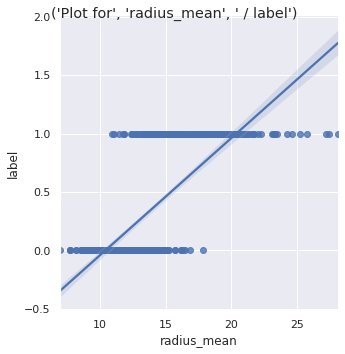

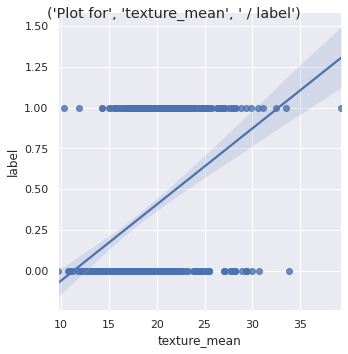

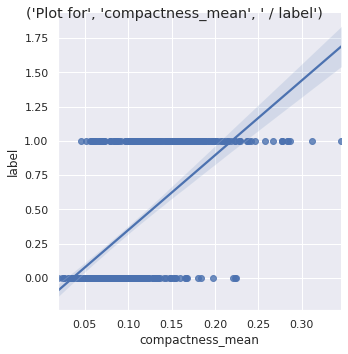

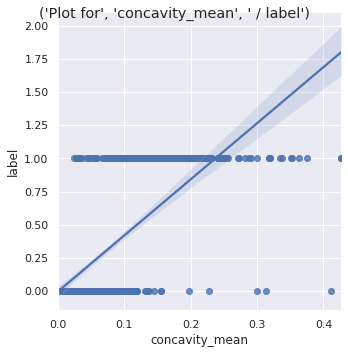

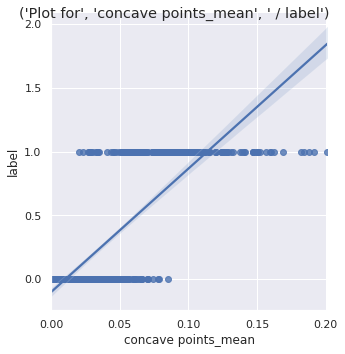

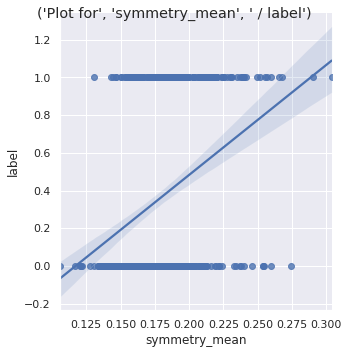

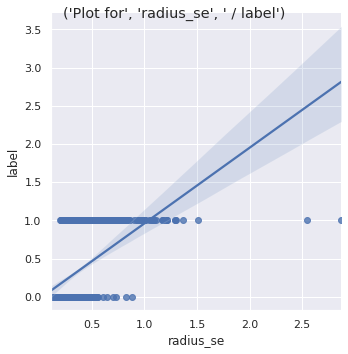

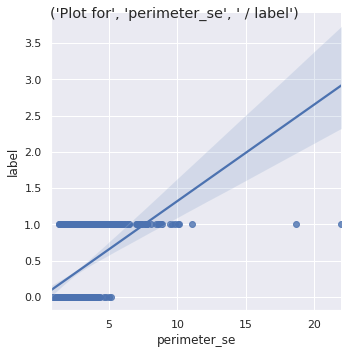

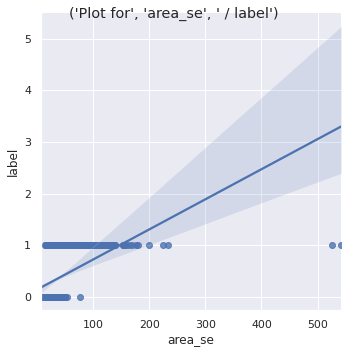

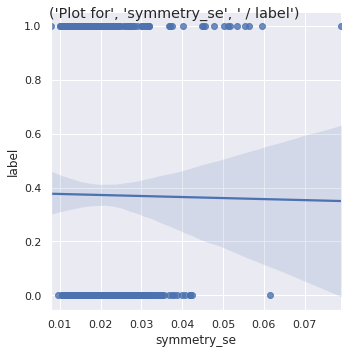

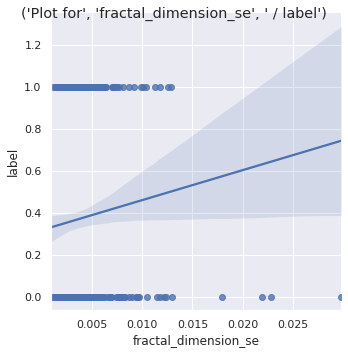

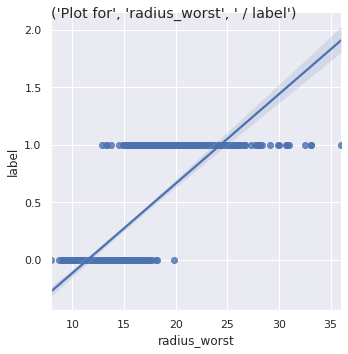

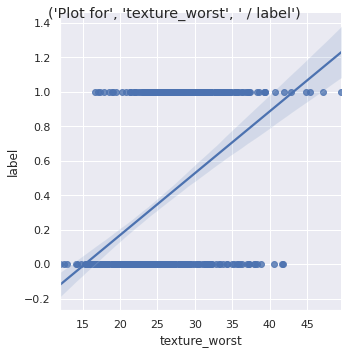

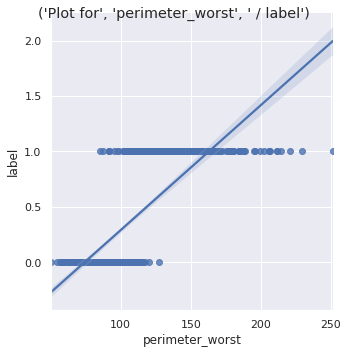

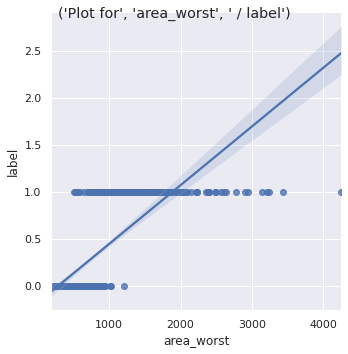

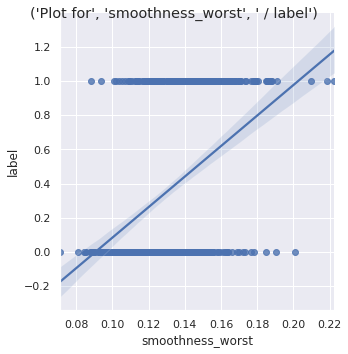

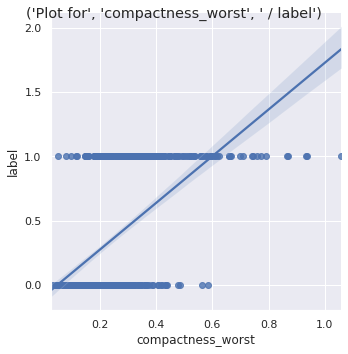

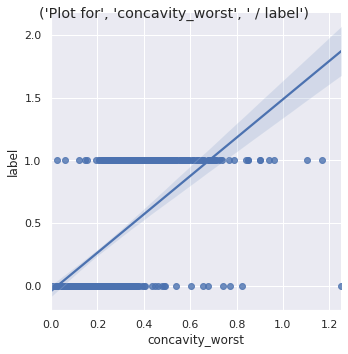

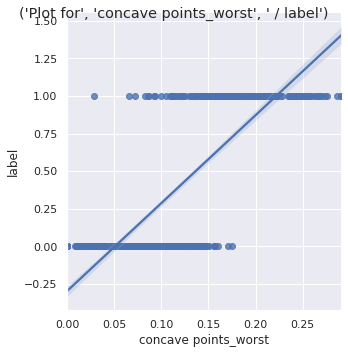

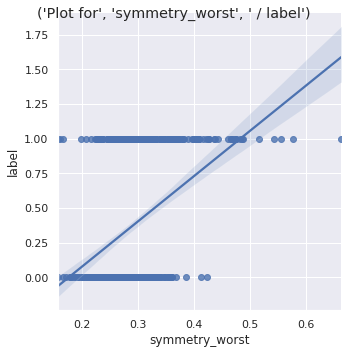

In [133]:
#Analysing important columns correlations with lmplot
for i in importantColumns:
    sns.lmplot(x=OD.drop("id","label").columns[i], y="label",data=OD.toPandas()).fig.suptitle(("Plot for",OD.drop("id","label").columns[i]," / label"))

In [0]:
#Creating a new dataset with only most important 20 features
assemblerr = VectorAssembler().setInputCols\
            ([OD.drop("label","id").columns[i] for i in importantColumns]).setOutputCol("features")
RND = assemblerr.transform(OD)

In [0]:
(trainingDataReduced, testDataReduced) = RND.select("label","features","id").randomSplit([0.7, 0.3],seed=100) #Splitting dataset into train and test

In [0]:
#Normalizing the training set
scaler1r = MinMaxScaler(inputCol="features",\
         outputCol="sf")
scalerModel1r =  scaler1r.fit(trainingDataReduced.select("features"))
trainingDataReduced = scalerModel1r.transform(trainingDataReduced)
trainingDataReduced=trainingDataReduced.drop("features")
trainingDataReduced=trainingDataReduced.withColumnRenamed("sf","features")

In [0]:
#Normalizing the test set
scalerr = MinMaxScaler(inputCol="features",\
         outputCol="sf")
scalerModelr =  scalerr.fit(testDataReduced.select("features"))
testDataReduced = scalerModelr.transform(testDataReduced)
testDataReduced=testDataReduced.drop("features")
testDataReduced=testDataReduced.withColumnRenamed("sf","features")

In [0]:
rfr = RandomForestClassifier(featuresCol = 'features', labelCol = 'label',seed=-3087325413071123553)#Creating Random-Forest model for selected features
rfModelr = rfr.fit(trainingDataReduced)
predictionsr = rfModelr.transform(testDataReduced)

In [139]:
tempM=predictionsr[predictionsr.prediction==1].toPandas()#we say all malignant
tempB=predictionsr[predictionsr.prediction==0].toPandas()#we say all beningn
result = pd.concat([tempM,tempB])
true_labels=(testDataReduced.orderBy("id").select("label")).toPandas()
predicted_labels=result.sort_values("id")["prediction"]
print("Random Forest Classification report for  normalized data (feature selection used)\n",classification_report(true_labels, predicted_labels),"\n")
print("Confusion matrix for model\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
rfR=confusion_matrix(true_labels,predicted_labels)

Random Forest Classification report for  normalized data (feature selection used)
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.92      0.96        64

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171
 

Confusion matrix for model
 [[107   0]
 [  5  59]] 




In [0]:
gbt = GBTClassifier(maxIter=10,seed=-1921504167437407479) #Creating Gradient Boost algorithm with feature selection
gbtModel = gbt.fit(trainingDataReduced)
predictions2r = gbtModel.transform(testDataReduced)

In [141]:
tempM=predictions2r[predictions2r.prediction==1].toPandas()#we say all malignant
tempB=predictions2r[predictions2r.prediction==0].toPandas()#we say all beningn
result = pd.concat([tempM,tempB])
true_labels=(testDataReduced.orderBy("id").select("label")).toPandas()
predicted_labels=result.sort_values("id")["prediction"]
print("Gradient Boost Classification report for  normalized data (feature selection used)\n",classification_report(true_labels, predicted_labels),"\n")
print("Confusion matrix for model\n",confusion_matrix(true_labels,predicted_labels),"\n\n")
gbtR=confusion_matrix(true_labels, predicted_labels)

Gradient Boost Classification report for  normalized data (feature selection used)
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       107
           1       0.95      0.89      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171
 

Confusion matrix for model
 [[104   3]
 [  7  57]] 




As you can see The most successfull model is random forest with selected features and feature selection is improved accuracies in both models.

## Evaluation<a class="anchor" id="evaluation"></a>

In order to evaluate models, I used macro_avg, f-scores and roc curve areas.

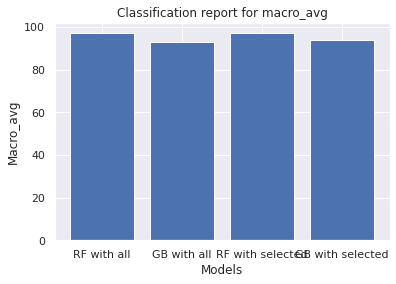

In [142]:
plt.bar(["RF with all","GB with all","RF with selected","GB with selected"],[97,93,97,94])
plt.title("Classification report for macro_avg")
plt.xlabel("Models")
plt.ylabel("Macro_avg")
plt.show()

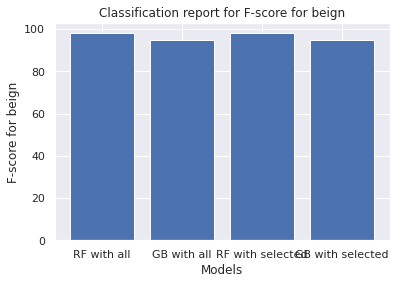

In [143]:
plt.bar(["RF with all","GB with all","RF with selected","GB with selected"],[98,95,98,95])
plt.title("Classification report for F-score for beign")
plt.xlabel("Models")
plt.ylabel("F-score for beign")
plt.show()

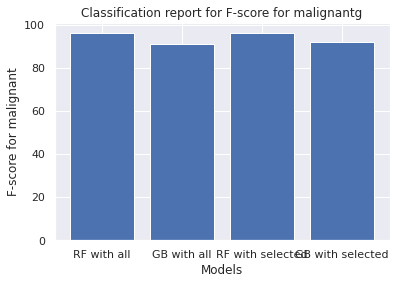

In [144]:
plt.bar(["RF with all","GB with all","RF with selected","GB with selected"],[96,91,96,92])
plt.title("Classification report for F-score for malignantg")
plt.xlabel("Models")
plt.ylabel("F-score for malignant")
plt.show()

Confusion matrix for Random-Forest with all features
 [[107   0]
 [  5  59]] 




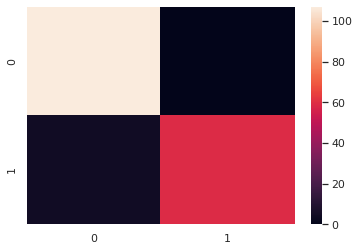

In [145]:
print("Confusion matrix for Random-Forest with all features\n",rfA,"\n\n")
ax = sns.heatmap(rfA)

Confusion matrix for Random-Forest with selected features
 [[107   0]
 [  5  59]] 




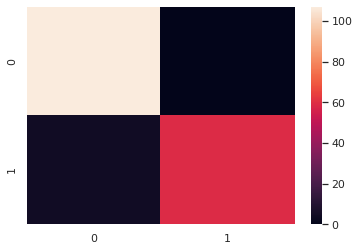

In [146]:
print("Confusion matrix for Random-Forest with selected features\n",rfR,"\n\n")
ax = sns.heatmap(rfR)

Confusion matrix for Gradient Boost with all features
 [[104   3]
 [  8  56]] 




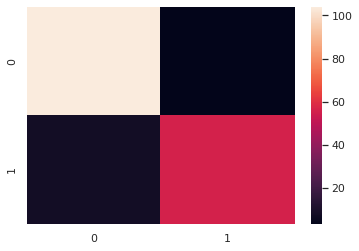

In [147]:
print("Confusion matrix for Gradient Boost with all features\n",gbtA,"\n\n")
ax = sns.heatmap(gbtA)

Confusion matrix for Gradient Boost with selected features
 [[104   3]
 [  7  57]] 




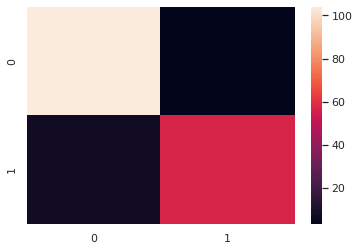

In [148]:
print("Confusion matrix for Gradient Boost with selected features\n",gbtR,"\n\n")
ax = sns.heatmap(gbtR)

In [149]:
#Roc curve area for Random forest all features
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')
print("Roc curve area for Random forest all features",evaluator.evaluate(predictions))

Roc curve area for Random forest all features 0.9966413551401868


In [150]:
#Roc curve area for Random forest selected features
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')
print("Roc curve area for Random forest selected features",evaluator.evaluate(predictionsr))

Roc curve area for Random forest selected features 0.9964953271028036


In [151]:
#Roc curve area for Gradient Boost all features
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')
print("Roc curve area for Gradient Boost all features features",evaluator.evaluate(predictions2))

Roc curve area for Gradient Boost all features features 0.968238901869159


In [152]:
#Roc curve area for Gradient Boost selected features
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol='label', metricName='areaUnderROC')
print("Roc curve area for Gradient Boost selected features features",evaluator.evaluate(predictions2r))

Roc curve area for Gradient Boost selected features features 0.9779497663551401


As you see the most successfull model is random-forest with selected features.The models with selected features give more accurate results on especially malignant class and all models predict dominant class (beign/0) more sucessfull.Lastly classification models give more accurate results according to clustering models.

## References<a class="anchor" id="references"></a>

In order to prepare this notebook, i got help from below sources

[1] https://spark.apache.org/docs/latest/

[2] https://www.datacamp.com/community/tutorials/apache-spark-tutorial-machine-learning

[3]https://github.com/tirthajyoti/Spark-with-Python


**Disclaimer!** <font color='grey'>This notebook was prepared by Nur Altıparmak as an assigment for the *BBM469 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>